<h3>Inicialização</h3>

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

<h3>Funções Auxiliares</h3>

In [2]:
# image entropy
def calcEntropy(img):
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist = hist.ravel()/hist.sum()
    logs = np.log2(hist+0.00001)
    entropy = -1 * (hist*logs).sum()

    return entropy

In [3]:
# huffman
from heapq import heappush, heappop, heapify
from collections import defaultdict

def encode(symb2freq):
    """Huffman encode the given dict mapping symbols to weights"""
    heap = [[wt, [sym, ""]] for sym, wt in symb2freq.items()]
    heapify(heap)
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heappop(heap)[1:], key=lambda p: (len(p[-1]), p))

<h3>Compressão Psicovisual</h3>

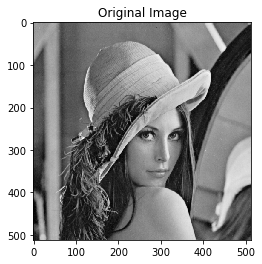

entropy: 7.44246578217


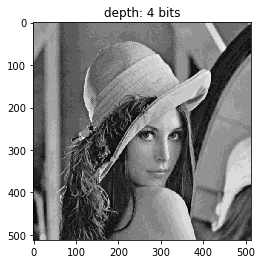

entropy: 3.49240708351


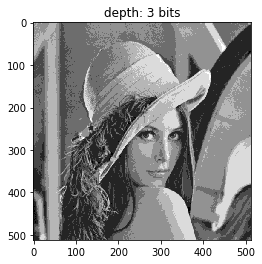

entropy: 2.5114171505


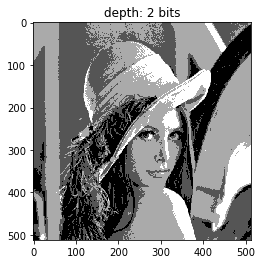

entropy: 1.79862165451


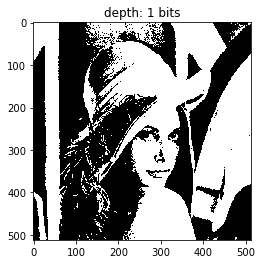

entropy: 0.999611139297


In [4]:
# original
img1 = cv2.imread('lena512.pgm',0)
plt.title('Original Image')
plt.imshow(img1, cmap = 'gray')
plt.show()
print 'entropy:', calcEntropy(img1)
calcEntropy(img1)

# 4 bits
img2 = img1 & 0xf0
plt.title('depth: 4 bits')
plt.imshow(img2, cmap = 'gray')
plt.show()
print 'entropy:', calcEntropy(img2)
calcEntropy(img2)

# 3 bits
img2 = img1 & 0xe0
plt.title('depth: 3 bits')
plt.imshow(img2, cmap = 'gray')
plt.show()
print 'entropy:', calcEntropy(img2)

# 2 bits
img2 = img1 & 0xc0
plt.title('depth: 2 bits')
plt.imshow(img2, cmap = 'gray')
plt.show()
print 'entropy:', calcEntropy(img2)
calcEntropy(img2)

# 1 bits
img2 = img1 & 0x80
plt.title('depth: 1 bits')
plt.imshow(img2, cmap = 'gray')
plt.show()
print 'entropy:', calcEntropy(img2)

<h3>Entropia</h3>

(7.4424657821655273, 5.5939216613769531)


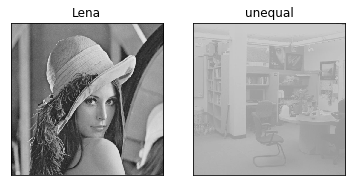

In [5]:
img1 = cv2.imread('lena512.pgm',0)
img2 = cv2.imread('unequal.png',0)

en1 = calcEntropy(img1)
en2 = calcEntropy(img2)

print (en1, en2)

plt.subplot(121),plt.imshow(img1, cmap = 'gray', clim=(0, 255))
plt.title('Lena'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2, cmap = 'gray', clim=(0, 255))
plt.title('unequal'), plt.xticks([]), plt.yticks([])
plt.show()

<h3>Compressão por Redundância de Código - Huffman</h3>

Symbol	Weight		Huffman Code
43	0.006264	0010100
44	0.006699	0011101
45	0.007042	0101011
46	0.007774	1000010
47	0.007881	1001001
48	0.007656	1000000
49	0.007938	1001010
50	0.007832	1000101
51	0.007778	1000011
52	0.007511	0111101
53	0.007042	0101100
54	0.006641	0011100
55	0.006382	0010110
56	0.005909	0001001
57	0.005638	0000011
95	0.005939	0001010
96	0.006210	0010000
97	0.006832	0100100
98	0.007069	0101110
99	0.008030	1001100
100	0.007362	0111010
101	0.007244	0110111
102	0.007404	0111011
103	0.007019	0101001
104	0.006725	0011111
105	0.006626	0011011
106	0.006058	0001100
107	0.005714	0000101
108	0.005592	0000010
117	0.005585	0000001
118	0.005890	0000111
119	0.005787	0000110
120	0.006203	0001111
121	0.006824	0100010
122	0.006828	0100011
123	0.007164	0110011
124	0.007862	1000111
125	0.007999	1001011
126	0.008816	1011101
127	0.008774	1011011
128	0.009098	1100101
129	0.009472	1101110
130	0.009117	1100110
131	0.008629	1010110
132	0.008526	1010101
133	0.008072	1001110
134	0.007603	0111110
135	0

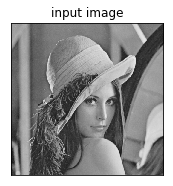

In [6]:
# load image
#img1 = cv2.imread('unequal.png',0)
img1 = cv2.imread('lena512.pgm',0)
#img1 = cv2.imread('200_s.pgm',0)
#img1 = cv2.imread('chessboard.jpg',0)

height, width =  img1.shape
entimg1 = calcEntropy(img1)

# compute histogram
hist = cv2.calcHist([img1],[0],None,[256],[0,256])
hist = hist.ravel()/hist.sum()

symb2freq = defaultdict(float)
for i in range(0,256):
    symb2freq[i] = hist[i]
    
#print symb2freq

# enconde
huff = encode(symb2freq)

print "Symbol\tWeight\t\tHuffman Code"
for p in huff:
    if (symb2freq[p[0]] > 0):
        print "%d\t%f\t%s" % (p[0], symb2freq[p[0]], p[1])
    
nbits = 0
for i in range(0,256):
    nbits += len(huff[i][1]) * hist[huff[i][0]] * height * width
    
# bits per pixel
bpp = nbits / (height * width)
     
print ("\nSummary:")    
print ("Image entropy: %5.3f" % entimg1)
print ("size: %d bytes" % (nbits / 8))
print ("%5.3f bits/pixel" % bpp)
print ("code efficiency: %5.3f" % (entimg1/bpp))
print ("Compression ratio (without header): %5.3f" % (8/bpp))

plt.subplot(121),plt.imshow(img1, cmap = 'gray', clim=(0, 255))
plt.title('input image'), plt.xticks([]), plt.yticks([])
plt.show()


Summary:
Image entropy: 1.585
size: 9992 bytes
1.998 bits/pixel
code efficiency: 0.793
Compression ratio (without header): 4.003

Huffman code
Symbol	Weight		Huffman Code
1	0.333925	0
2	0.333700	11
0	0.332375	101


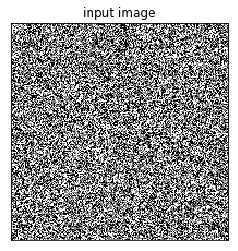

In [7]:
# compression with a random image

# generate the input random image
size = 200, 200
img1 = np.zeros(size, dtype=np.uint8)
# min and max grayvalues
minV = 0
maxV = 2 # 2, 15, 63
img1 = cv2.randu(img1, minV, maxV+1)

height, width =  img1.shape
entimg1 = calcEntropy(img1)

# compute histogram
hist = cv2.calcHist([img1],[0],None,[256],[0,256])
hist = hist.ravel()/hist.sum()

symb2freq = defaultdict(float)
for i in range(0,256):
    symb2freq[i] = hist[i]
    
# enconde
huff = encode(symb2freq)    

nbits = 0
for i in range(0,256):
    nbits += len(huff[i][1]) * hist[huff[i][0]] * height * width
    
# bits per pixel
bpp = nbits / (height * width)
     
print ("\nSummary:")    
print ("Image entropy: %5.3f" % entimg1)
print ("size: %d bytes" % (nbits / 8))
print ("%5.3f bits/pixel" % bpp)
print ("code efficiency: %5.3f" % (entimg1/bpp))
print ("Compression ratio (without header): %5.3f" % (8/bpp))

print "\nHuffman code\nSymbol\tWeight\t\tHuffman Code"
for p in huff:
    if (symb2freq[p[0]] > 0):
        print "%d\t%f\t%s" % (p[0], symb2freq[p[0]], p[1])
        
plt.imshow(img1, cmap = 'gray', clim=(minV, maxV))
plt.title('input image'), plt.xticks([]), plt.yticks([])
plt.show()